# Main imports and Functions

In [2]:
#import the libraries needed to run the code
%matplotlib inline
import cv2 as cv 
import matplotlib.pyplot as plt 
import numpy as np 

In [5]:
#Function to plot two figures
def Comparison_pictures(figure_width, figure_height, img1,label1, img2,label2,map_color):
    fig,ax=plt.subplots(1,2, figsize=(int(figure_width),int(figure_height)))
    ax[0].imshow(img1,cmap=map_color,vmin=0,vmax=255)
    ax[0].set_title(str(label1))
    ax[0].axis('off')
    ax[1].imshow(img2,cmap=map_color,vmin=0,vmax=255)
    ax[1].set_title(str(label2))
    ax[1].axis('off')
    plt.show()


# Histogram Calculation


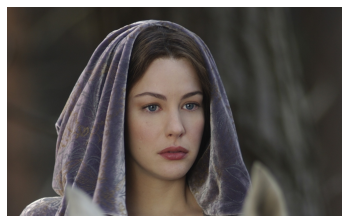

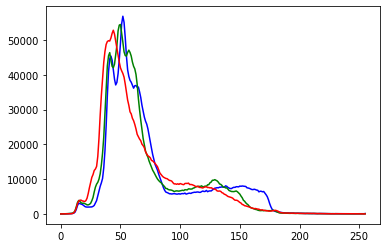

In [3]:
img = cv.imread('a01images/im02.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis("off")
plt.show()
color = ('b', 'g', 'r')
for i,c in enumerate(color):
    hist = cv.calcHist([img],[i],None,[256],[0,256])
    plt.plot(hist,color=c)
plt.show()

# Histogram Equalization

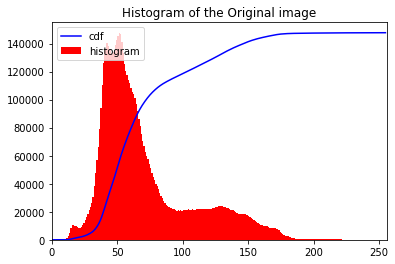

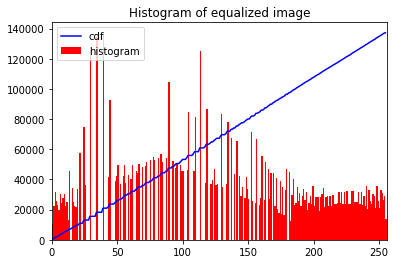

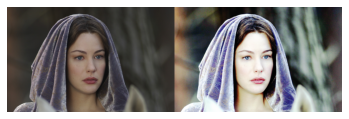

In [6]:
#ravel returns a flattened array

#The numpy.ravel()
#functions returns contiguous flattened array(1D array with all the input-array elements and with the same type as it).
#histogram function - numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)

#a- Input data. The histogram is computed over the flattened array.
#range - The lower and upper range of the bins
#hist - values of the histogram
hist,bins = np.histogram(img.ravel(),256,[0,256])

cdf = hist.cumsum()  # Return the cumulative sum of the elements along a given axis.

cdf_normalized=cdf*hist.max()/cdf.max()

plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.plot(cdf_normalized, color = 'b')

plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Histogram of the Original image")
plt.show()

R, G, B = cv.split(img)

equ = cv.merge((cv.equalizeHist(R), cv.equalizeHist(G), cv.equalizeHist(B))) # equalize the R G B part
hist,bins= np.histogram(equ.ravel(),256,[0,256])
cdf=hist.cumsum()
cdf_normalized = cdf*hist.max()/cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256],color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.title("Histogram of equalized image")
plt.show()

res = np.hstack((img,equ))
plt.axis('off')
#plt.imshow(img,cmap='gray')
plt.imshow(res,cmap='gray')

# Intensity Transformations

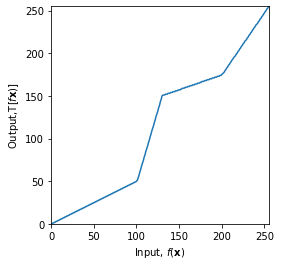

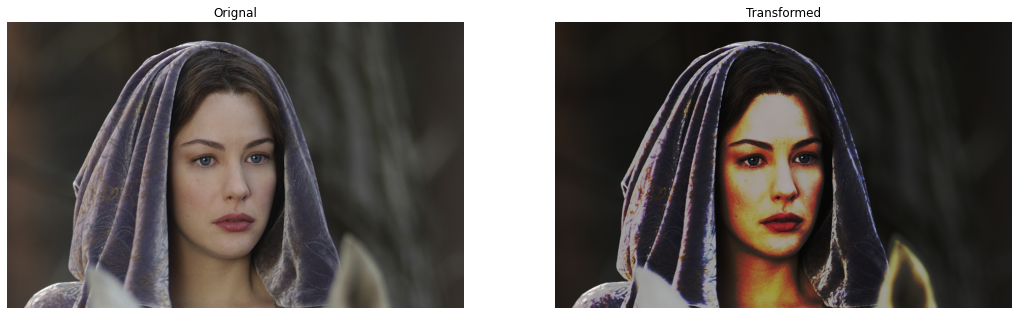

In [6]:
# define the parameters to transformation
c=np.array([(100,50),(130,150),(200,175)])
t1=np.linspace(0,c[0,1],c[0,0]+1-0).astype('uint8')
t2=np.linspace(c[0,1]+1,c[1,1],c[1,0]-c[0,0]).astype('uint8')
t3=np.linspace(c[1,1]+1,c[2,1],c[2,0]-c[1,0]).astype('uint8')
t4=np.linspace(c[2,1]+1,255,255-c[2,0]).astype('uint8')
transform=np.concatenate((t1,t2,t3,t4),axis=0).astype('uint8')

image_transformed=cv.LUT(img,transform) # perform as a look up table. Here the transformation happens

fig,ax=plt.subplots()
ax.plot(transform)
ax.set_xlabel(r'Input, $f(\mathbf{x})$')
ax.set_ylabel('Output,$\mathrm{T}[f\mathbf{x})]$')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()

Comparison_pictures(18,18,img,'Orignal', image_transformed, 'Transformed','gray')

# Gamma Correction

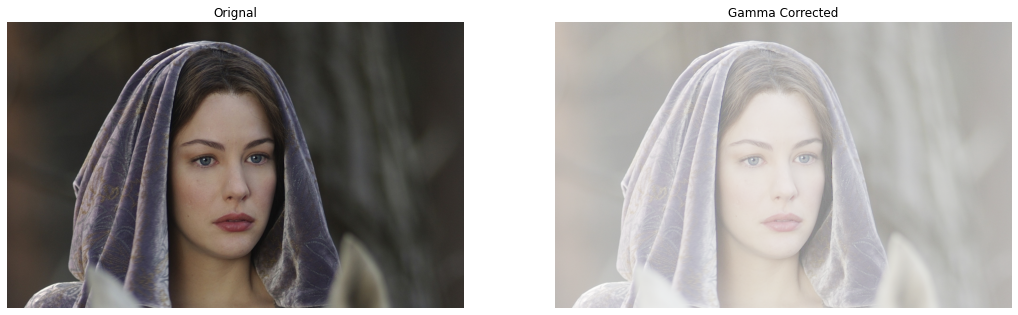

In [27]:
img = cv.imread('a01images/im02.png', cv.IMREAD_COLOR)
img_orig= cv.cvtColor(img, cv.COLOR_BGR2RGB)

gamma = 0.2
table = np.array([(i/255.0)**(gamma)*255.0 for i in np.arange(0,256)]).astype('uint8') # multiply all the pixel from the gamma function
img_gamma = cv.LUT(img_orig,table)

Comparison_pictures(18,18,img_orig,'Orignal', img_gamma, 'Gamma Corrected',None)

# Gaussian Smoothing

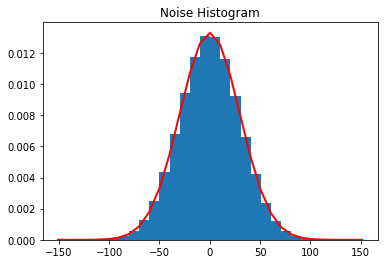

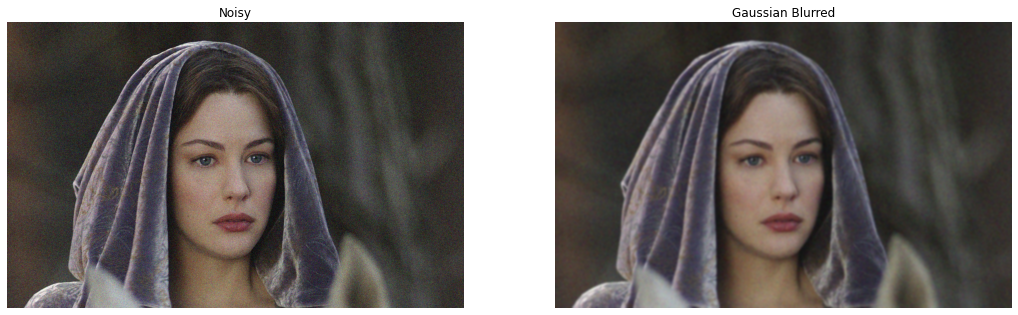

In [7]:
img=cv.cvtColor(img, cv.IMREAD_COLOR)
# print(img.dtype)
# print(img.max())
mu = 0.0
sigma = 30
gauss = np.array(img.shape).astype('uint8')
h,w,c = img.shape

#Draw random samples from a normal (Gaussian) distribution.
#random.normal(loc=0.0, scale=1.0, size=None)
#loc: Mean (“centre”) of the distribution.
#scale: Standard deviation (spread or “width”) of the distribution. Must be non-negative.
#size:Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.
gauss = np.random.normal(mu,sigma,(h,w,c))
noisy = cv.add(img, gauss, dtype = cv.CV_8UC3)

count,bins, ignored= plt.hist(gauss.ravel(), 30, density =True)
plt.plot(bins, 1/(sigma*np.sqrt(2*np.pi))* np.exp(-(bins-mu)**2/ (2*sigma**2)), linewidth= 2, color='r') # plot the Gaussian function in 2-D  
plt.title('Noise Histogram')
plt.show()

#set the filter halfwidth to abouy 3sigma, so if sigma = 1, kernel size is 3x1x2 + 1 = 7
ksize = 19
sigma = 4
blur = cv.GaussianBlur(noisy,(ksize,ksize),sigma)
Comparison_pictures(18,18,noisy,'Noisy',blur, 'Gaussian Blurred',None)


# Unsharp masking

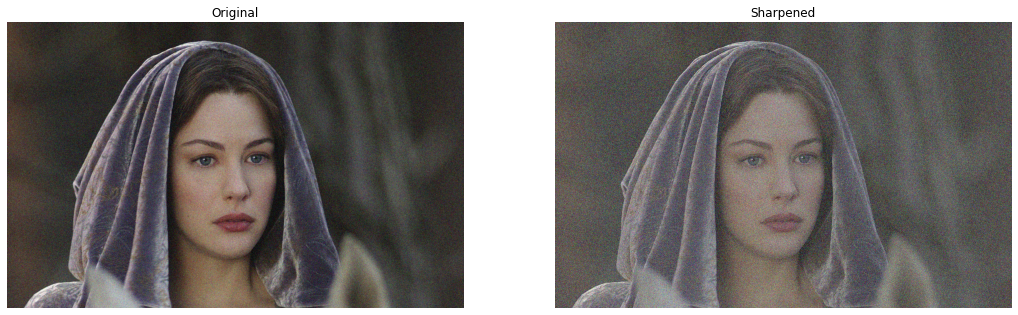

In [8]:
img = cv.imread('a01images/im02.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
 
#sobel vertical
kernel = np.array([(0,-1,0),(-1,5,-1),(0,-1,0)], dtype='float') # when you add all the elements, the result should be 1
imgc = cv.filter2D(noisy,-1,kernel)

Comparison_pictures(18,18,noisy,'Original',imgc, 'Sharpened','gray')


# Median Filtering

C:\Users\Manjitha Kularatne\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  if sys.path[0] == '':
C:\Users\Manjitha Kularatne\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:18: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


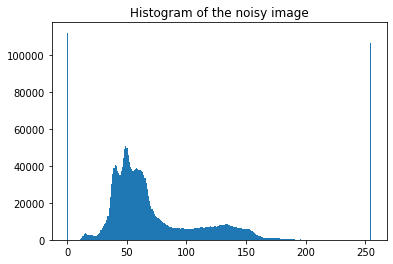

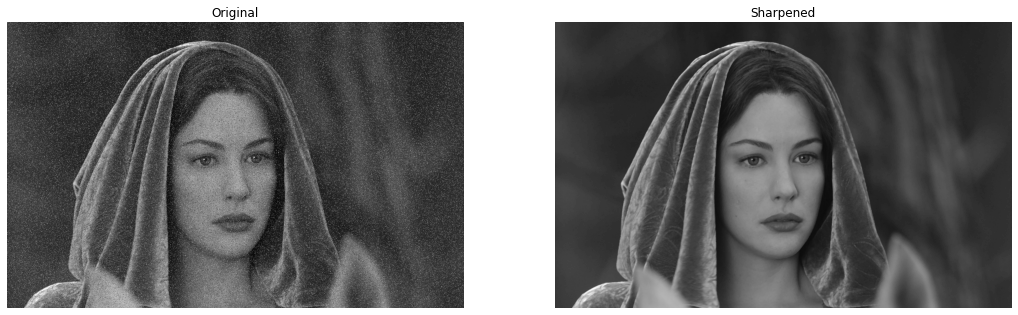

In [10]:
# salt and paper noise
def noisy(noise_typ,image):
   if noise_typ == "s&p":
      row,col = image.shape[0],image.shape[1]
      s_vs_p = 0.5
      amount = 0.1
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 255

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
img = cv.imread('a01images/im02.png', cv.IMREAD_GRAYSCALE)

imn = noisy('s&p',img.astype('float32'))
#cv.medianBlur(src, ksize)
imf = cv.medianBlur(imn,5)  #inbuild filter

plt.hist(imn.ravel(), bins = 256)
plt.title("Histogram of the noisy image")

Comparison_pictures(18,18,imn,'Original',imf, 'Sharpened','gray')


# Bilateral filter

In [12]:
img = cv.imread('a01images/im02.png', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
mu = 0.0
sigma = 50
gauss = np.array(img.shape).astype('uint8')
h,w,c = img.shape
#Draw random samples from a normal (Gaussian) distribution.
#random.normal(loc=0.0, scale=1.0, size=None)
#loc: Mean (“centre”) of the distribution.
#scale: Standard deviation (spread or “width”) of the distribution. Must be non-negative.
#size:Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. If size is None (default), a single value is returned if loc and scale are both scalars. Otherwise, np.broadcast(loc, scale).size samples are drawn.
gauss = np.random.normal(mu,sigma,(h,w,c))

noisy = cv.add(noisy, gauss, dtype = cv.CV_8UC3)


bilateral = cv.bilateralFilter(noisy,15,75,75) #cv.bilateralFilter (InputArray src, OutputArray dst, int d, double sigmaColor, double sigmaSpace, int borderType=BORDER_DEFAULT)

Comparison_pictures(18,18,noisy,'Original',bilateral, 'Bilateral','gray')


TypeError: Expected Ptr<cv::UMat> for argument 'src1'

# RICE GRAIN COUNT

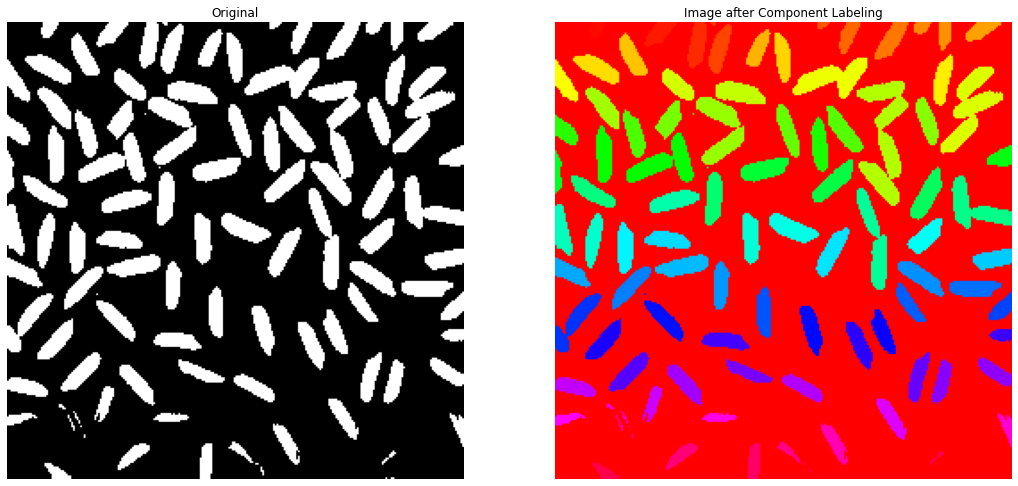

Number of Rice: 101


In [17]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


def connected_component_label(path):
    
    # Getting the input image
    img = cv.imread(path,0)
    
    blur = cv.GaussianBlur(img, (3,3), 0.35,0.35,cv.BORDER_REPLICATE)
    
    # Converting those pixels with values 1-127 to 0 and others to 1
    img = cv.threshold(blur, 127, 255, cv.THRESH_BINARY)[1]
    
    # Applying cv2.connectedComponents()
    num_labels, labels = cv.connectedComponents(img)
    
    
    # Map component labels to hue val, 0-179 is the hue range in OpenCV
    label_hue = np.uint8(179*labels/np.max(labels))
    blank_ch = 255*np.ones_like(label_hue)
    labeled_img = cv.merge([label_hue, blank_ch, blank_ch])

    # Converting cvt to BGR
    labeled_img = cv.cvtColor(labeled_img, cv.COLOR_HSV2BGR)

    # set bg label to black
    labeled_img[label_hue==0] = 0
    
    Comparison_pictures(18,18, cv.cvtColor(img, cv.COLOR_BGR2RGB),'Original',cv.cvtColor(labeled_img, cv.COLOR_BGR2RGB), "Image after Component Labeling",None)
    
    print("Number of Rice:", num_labels)

connected_component_label('a01images/rice.png')

# IMAGE ZOOMING

75.37807161458333


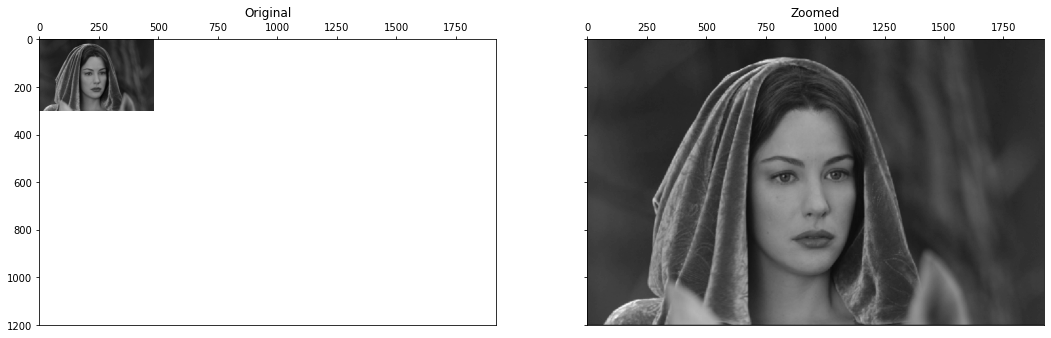

(300, 480)
(1200, 1920)


In [21]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 

img1 = cv.imread('a01images/im02.png',cv.IMREAD_GRAYSCALE)
img = cv.imread('a01images/im02small.png',cv.IMREAD_GRAYSCALE)

def zoom(interpolation_method, img, scale):
    if scale <= 0 or scale > 10:
        return print('Enter a scale between 0 and 10')
    else:
        rows = int(scale*img.shape[0])
        cols = int(scale*img.shape[1])
        #adding a row and a column similar to the last row and col of the image to prevent errors
        new_row = img[-1] 
        new_img = np.append(img, new_row)
        new_img = new_img.reshape((img.shape[0]+1,img.shape[1]))
        column =[]
        for x in new_img:
            last = (x[-1])
            x = np.append(x, last)
            column = np.append(column,x)
        column = column.reshape((img.shape[0]+1,img.shape[1]+1))
        zoomed = np.zeros((rows,cols), dtype =img.dtype)

        if interpolation_method == 'nearest_neighbor':
            for i in range(0, rows-1):
                for j in range(0, cols):
                    zoomed[i,j] = column[round(i/scale) , round(j/scale)]
            zoomed = np.uint8(zoomed)
            return(zoomed)
        elif interpolation_method == 'bilinear':
            for i in range(0, rows):
                for j in range(0, cols):
                    x_val = float(i/scale)
                    y_val = float(j/scale)
                    y_min = int(j/scale)
                    y_max = y_min+1
                    y = round(y_min*(y_max - y_val) + y_max*(y_val - y_min))
                    x_min = int(i/scale)
                    x_max = x_min+1
                    x = round(x_min*(x_max - x_val) + x_max*(x_val - x_min))
                    zoomed[i,j] = column[x,y]
            zoomed = np.uint8(zoomed)
            return(zoomed)
        else:
            print("Please add your interpolation method.")

def ssd_per_pixel(img1, img2): # sum of square differnce for the each pixel
    if img1.shape != img2.shape:
        print("Image shapes are not similar")
    else:
        ssd = (np.sum((np.array(img1, dtype=np.int) - np.array(img2, dtype=np.int))**2))/(img1.shape[0]*img2.shape[1])
        return(ssd)
scale = 4 #Change the scale here
zoomed = zoom('nearest_neighbor', img, scale)
ssd = ssd_per_pixel(img1, zoomed)
print(ssd)
if scale < 1:
    limit_x = img.shape[1]
    limit_y = img.shape[0]
else:
    limit_x = zoomed.shape[1]
    limit_y = zoomed.shape[0]

fig,axes = plt.subplots(1,2, sharex = 'all', sharey = 'all',figsize=(18,18))
axes[0].imshow(img,cmap = 'gray')
axes[0].set_title('Original')
axes[0].set_xlim(0, limit_x)
axes[0].set_ylim(0, limit_y)
axes[0].xaxis.tick_top()
axes[1].imshow(zoomed,cmap = 'gray')
axes[1].set_title('Zoomed')
axes[1].set_xlim(0, limit_x)
axes[1].set_ylim(0, limit_y)
axes[1].xaxis.tick_top()
axes[1].invert_yaxis()
plt.show()
print(img.shape)
print(zoomed.shape)


65.41742491319444


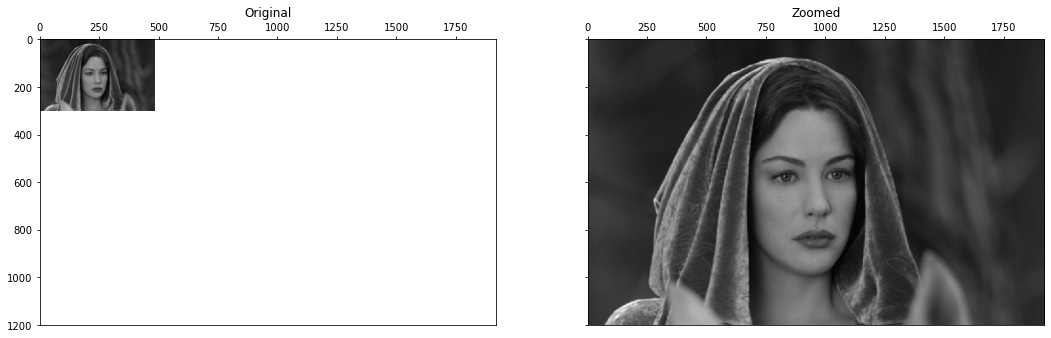

(300, 480)
(1200, 1920)


In [77]:
zoomed = zoom('bilinear', img, scale)
ssd = ssd_per_pixel(img1, zoomed)
print(ssd)
if scale < 1:
    limit_x = img.shape[1]
    limit_y = img.shape[0]
else:
    limit_x = zoomed.shape[1]
    limit_y = zoomed.shape[0]

fig,axes = plt.subplots(1,2, sharex = 'all', sharey = 'all',figsize=(18,18))
axes[0].imshow(img,cmap = 'gray')
axes[0].set_title('Original')
axes[0].set_xlim(0, limit_x)
axes[0].set_ylim(0, limit_y)
axes[0].xaxis.tick_top()
axes[1].imshow(zoomed,cmap = 'gray')
axes[1].set_title('Zoomed')
axes[1].set_xlim(0, limit_x)
axes[1].set_ylim(0, limit_y)
axes[1].xaxis.tick_top()
axes[1].invert_yaxis()
plt.show()
print(img.shape)
print(zoomed.shape)